# MSc Project - Questionnaire Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
# Check python version.
# This code should run for python version >=3.6

print("python", sys.version)

python 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]


### Get Data

In [3]:
data = pd.read_pickle("processed_data.pkl")

In [4]:
df = data.copy()

In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'EducationLevel', 'EducationGroup', 'Student',
       'NumberofSiblings', 'NumberofParents', 'FemaleParentEducationGroup',
       'FemaleParentEducationLevel', 'MaleParentEducationGroup',
       'MaleParentEducationLevel', 'FemaleParentInfluence',
       'MaleParentInfluence', 'Label'],
      dtype='object')

## Exploring Basic Demographics

In [ ]:
print("Number of Participants:", df.shape[0])

Number of Participants: 355


In [ ]:
print(df["Gender"].value_counts())

Woman    224
Man      131
Name: Gender, dtype: int64


In [ ]:
print(df["EducationGroup"].value_counts())

Engineering               152
Health                     88
Technology                 35
Arts and humanities        33
Business and economics     28
Social sciences            19
Name: EducationGroup, dtype: int64


In [ ]:
print(df["EducationLevel"].value_counts())

Masters      167
Bachelors     93
Secondary     73
Doctoral      16
Primary        6
Name: EducationLevel, dtype: int64


## Gender

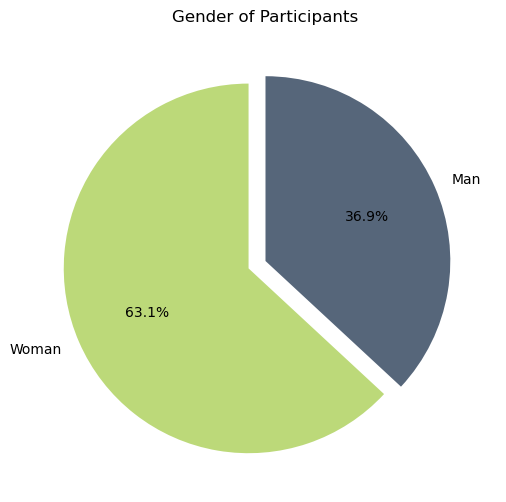

In [ ]:
# Count occurrences of each gender
gender_counts = df["Gender"].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#BCD979', '#56667A'], explode=(0.1, 0))
plt.title('Gender of Participants')
plt.ylabel('')
plt.show()

## Age

In [13]:
df['Age'].median()

37.0

In [ ]:
# Create bins for age ranges
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']

# Add a new column for the age range
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_range_counts = df['Age Range'].value_counts()

print(age_range_counts)

20-30    104
30-40    100
40-50     57
50-60     48
60+       46
0-20       0
Name: Age Range, dtype: int64


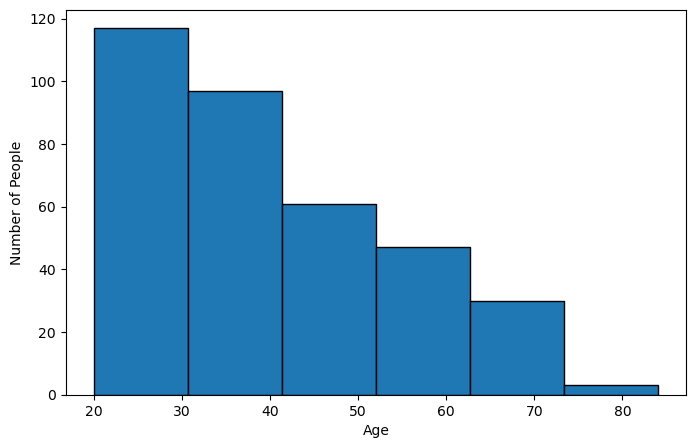

In [ ]:
# Plot histogram of age distribution
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=6, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.show()

## Student or Graduate

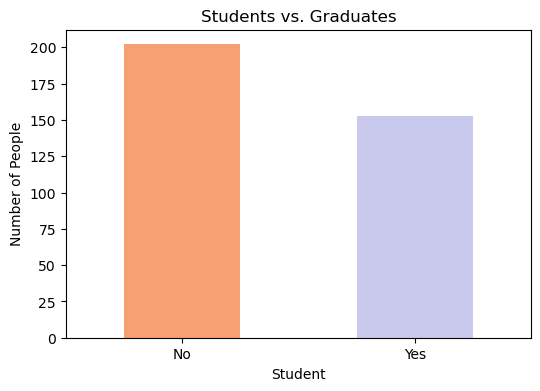

In [ ]:
# Count occurrences of each gender
gender_counts = df["Student"].value_counts()

# Plot bar chart
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=['#F7A072', '#C9C9EE'])
plt.xlabel('Student')
plt.ylabel('Number of People')
plt.title('Students vs. Graduates')
plt.xticks(rotation=0)
plt.show()

## Label

In [17]:
df['Label'].value_counts()

0    285
2     39
1     24
3      7
Name: Label, dtype: int64

## How Many Participants Have the Same Education Group as at Least One Parent?

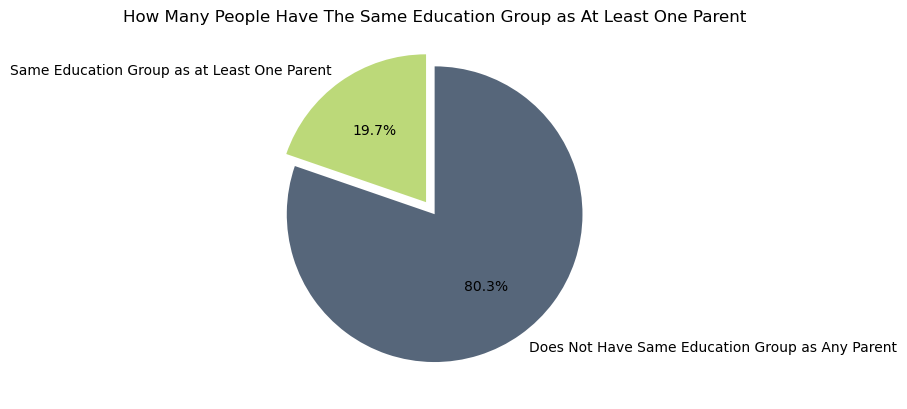

In [ ]:
true_count = df[df['Label']>0].shape[0] 
false_count = df.shape[0] - true_count 

labels = ['Same Education Group as at Least One Parent', 'Does Not Have Same Education Group as Any Parent']
sizes = [true_count, false_count]
colors = ['#BCD979', '#56667A']
explode = (0.1, 0) 

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('How Many People Have The Same Education Group as At Least One Parent')

plt.show()


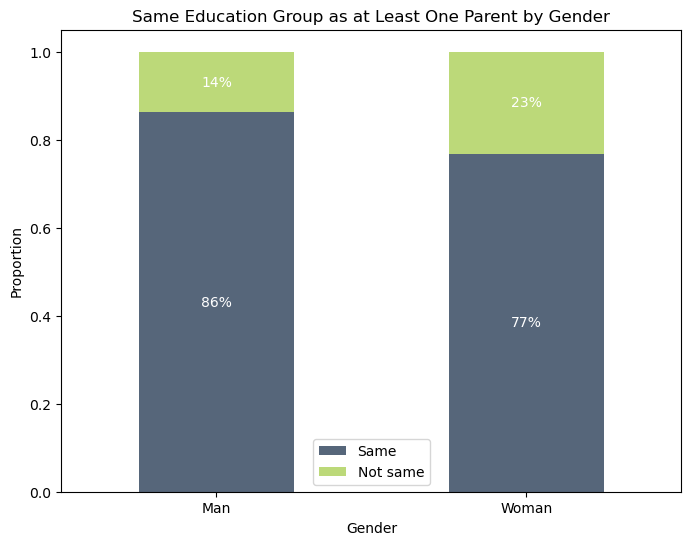

In [ ]:
temp_df = df.copy()
temp_df['same'] = temp_df['Label'] != 0

# Calculate proportions for each gender
proportions = temp_df.groupby(['Gender', 'same']).size().unstack()
proportions = proportions.div(proportions.sum(axis=1), axis=0)

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
proportions.plot(
    kind='bar',
    stacked=True,
    color=['#56667A', '#BCD979'],  # Custom colors
    figsize=(8, 6),
    ax=ax
)

# Add labels and title
plt.title('Same Education Group as at Least One Parent by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(labels=['Same', 'Not same'])
plt.xticks(rotation=0)

# Add percentages to the bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0: 
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.0%}',
                ha='center',
                va='center',
                color='white',
                fontsize=10
            )

plt.show()


### Overview of porportion of people in each education group and parents education group

In [20]:
temp_df = df.copy()
temp_df['same'] = temp_df['Label'] != 0

temp_df = temp_df[['Gender', 'same', 'EducationGroup']].groupby(['Gender', 'same', 'EducationGroup']).size().unstack().fillna(0)

# Calculate total counts (True + False) for each Gender and EducationGroup
totals = temp_df.groupby(level='Gender').sum()

# Calculate percentages of `same=True`
percentages = temp_df.loc[(slice(None), True), :] / totals * 100

# Reset index to make the output readable
percentages = percentages.reset_index(level='same', drop=True)

# Print the results
print(percentages)


EducationGroup  Arts and humanities  Business and economics  Engineering  \
Gender                                                                     
Man                       14.285714               50.000000     8.333333   
Woman                     26.923077               44.444444    20.588235   

EducationGroup  Health  Social sciences  Technology  
Gender                                               
Man               50.0         0.000000    5.882353  
Woman             22.5         7.142857   22.222222  


In [21]:
total_f = df['FemaleParentEducationLevel'].notna().sum()
total_m = df['MaleParentEducationLevel'].notna().sum()

In [22]:
f_uni = df[(df['FemaleParentEducationLevel']=='Bachelors') | (df['FemaleParentEducationLevel']=='Masters') | (df['FemaleParentEducationLevel']=='Doctoral')].shape[0]
print("Percentage of female parents with university degrees: ", np.round((f_uni/total_f)*100, 2), "%")

Percentage of female parents with university degrees:  44.89 %


In [23]:
m_uni = df[(df['MaleParentEducationLevel']=='Bachelors') | (df['MaleParentEducationLevel']=='Masters') | (df['MaleParentEducationLevel']=='Doctoral')].shape[0]
print("Percentage of male parents with university degrees: ", np.round((m_uni/total_m)*100, 2), "%")

Percentage of male parents with university degrees:  41.52 %


In [24]:
print("Percentage of parents with university degrees: ", np.round(((m_uni+f_uni)/(total_m+total_f))*100, 2))

Percentage of parents with university degrees:  43.26


In [25]:
edu_groups = df['EducationGroup'].unique().tolist()

for group in edu_groups:
    total = df[df['EducationGroup'] == group]
    label0 = total[total['Label']!=0]
    print(np.round((label0.shape[0]/total.shape[0])*100, 2), "% of people in", group, "have the same education group as a parent")


46.43 % of people in Business and economics have the same education group as a parent
13.82 % of people in Engineering have the same education group as a parent
14.29 % of people in Technology have the same education group as a parent
25.0 % of people in Health have the same education group as a parent
5.26 % of people in Social sciences have the same education group as a parent
24.24 % of people in Arts and humanities have the same education group as a parent


In [26]:
for group in edu_groups:
    total = df[df['FemaleParentEducationGroup'] == group]
    label0 = total[(total['Label']==1) | (total['Label']==3)]
    print("If a female parent has a degree in ", group, np.round((label0.shape[0]/total.shape[0])*100, 2), "% of their children also have a degree in the same group")

If a female parent has a degree in  Business and economics 15.62 % of their children also have a degree in the same group
If a female parent has a degree in  Engineering 66.67 % of their children also have a degree in the same group
If a female parent has a degree in  Technology 50.0 % of their children also have a degree in the same group
If a female parent has a degree in  Health 31.25 % of their children also have a degree in the same group
If a female parent has a degree in  Social sciences 0.0 % of their children also have a degree in the same group
If a female parent has a degree in  Arts and humanities 31.58 % of their children also have a degree in the same group


In [27]:
for group in edu_groups:
    total = df[df['MaleParentEducationGroup'] == group]
    label0 = total[(total['Label']==2) | (total['Label']==3)]
    print("If a male parent has a degree in ", group, np.round((label0.shape[0]/total.shape[0])*100, 2), "% of their children also have a degree in the same group")

If a male parent has a degree in  Business and economics 22.0 % of their children also have a degree in the same group
If a male parent has a degree in  Engineering 62.96 % of their children also have a degree in the same group
If a male parent has a degree in  Technology 33.33 % of their children also have a degree in the same group
If a male parent has a degree in  Health 47.37 % of their children also have a degree in the same group
If a male parent has a degree in  Social sciences 11.11 % of their children also have a degree in the same group
If a male parent has a degree in  Arts and humanities 36.36 % of their children also have a degree in the same group


In [28]:
for group in edu_groups:
    total = df[(df['FemaleParentEducationGroup'] == group) & (df['Gender'] == 'Woman')]
    label0 = total[(total['Label']==1) | (total['Label']==3)]
    total_num = total.shape[0]
    if total_num:
        calc = np.round((label0.shape[0]/total_num)*100, 2)
        print("If a female parent has a degree in ", group, calc, "% of their female children also have a degree in the same group")

If a female parent has a degree in  Business and economics 18.18 % of their female children also have a degree in the same group
If a female parent has a degree in  Engineering 100.0 % of their female children also have a degree in the same group
If a female parent has a degree in  Health 40.0 % of their female children also have a degree in the same group
If a female parent has a degree in  Social sciences 0.0 % of their female children also have a degree in the same group
If a female parent has a degree in  Arts and humanities 38.46 % of their female children also have a degree in the same group


In [29]:
for group in edu_groups:
    total = df[(df['FemaleParentEducationGroup'] == group) & (df['Gender'] == 'Man')]
    label0 = total[(total['Label']==1) | (total['Label']==3)]
    print("If a female parent has a degree in ", group, np.round((label0.shape[0]/total.shape[0])*100, 2), "% of their male children also have a degree in the same group")

If a female parent has a degree in  Business and economics 10.0 % of their male children also have a degree in the same group
If a female parent has a degree in  Engineering 50.0 % of their male children also have a degree in the same group
If a female parent has a degree in  Technology 50.0 % of their male children also have a degree in the same group
If a female parent has a degree in  Health 7.69 % of their male children also have a degree in the same group
If a female parent has a degree in  Social sciences 0.0 % of their male children also have a degree in the same group
If a female parent has a degree in  Arts and humanities 16.67 % of their male children also have a degree in the same group


In [30]:
for group in edu_groups:
    total = df[(df['MaleParentEducationGroup'] == group) & (df['Gender'] == 'Man')]
    label0 = total[(total['Label']==2) | (total['Label']==3)]
    total_num = total.shape[0]
    if total_num:
        calc = np.round((label0.shape[0]/total_num)*100, 2)
        print("If a male parent has a degree in ", group, calc, "% of their male children also have a degree in the same group")

If a male parent has a degree in  Business and economics 16.67 % of their male children also have a degree in the same group
If a male parent has a degree in  Engineering 71.43 % of their male children also have a degree in the same group
If a male parent has a degree in  Technology 0.0 % of their male children also have a degree in the same group
If a male parent has a degree in  Health 57.14 % of their male children also have a degree in the same group
If a male parent has a degree in  Social sciences 0.0 % of their male children also have a degree in the same group
If a male parent has a degree in  Arts and humanities 20.0 % of their male children also have a degree in the same group


In [31]:
for group in edu_groups:
    total = df[(df['MaleParentEducationGroup'] == group) & (df['Gender'] == 'Woman')]
    label0 = total[(total['Label']==2) | (total['Label']==3)]
    total_num = total.shape[0]
    if total_num:
        calc = np.round((label0.shape[0]/total_num)*100, 2)
        print("If a male parent has a degree in ", group, calc, "% of their female children also have a degree in the same group")

If a male parent has a degree in  Business and economics 26.92 % of their female children also have a degree in the same group
If a male parent has a degree in  Engineering 60.0 % of their female children also have a degree in the same group
If a male parent has a degree in  Technology 44.44 % of their female children also have a degree in the same group
If a male parent has a degree in  Health 41.67 % of their female children also have a degree in the same group
If a male parent has a degree in  Social sciences 16.67 % of their female children also have a degree in the same group
If a male parent has a degree in  Arts and humanities 50.0 % of their female children also have a degree in the same group
